In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sbrn
import numpy as np
import re
import datetime
import pickle
import sklearn

%matplotlib inline

In [366]:
dat = pd.read_csv('./../../data/water_pump/training.csv', header=0)
labels = pd.read_csv('./../../data/water_pump/training_labels.csv', header=0)
#join labels to dat on "id" (left outer)

dat=dat.merge(labels, how='left', left_on='id', right_on='id',copy=False)

In [367]:
dat.shape

(59400, 41)

In [368]:
dat.population.replace(to_replace={0:np.nan}, inplace=True)

In [369]:
dat.population.isnull().sum()

21381

In [372]:
dat.subvillage.unique().shape

(19288,)

In [451]:
grp=dat.groupby(['subvillage'])['population'].mean().reset_index()

In [395]:
loc='subvillage'
col='population'

temp1=dat.groupby(dat[loc])[col].mean().reset_index()

In [398]:
temp1.loc[~temp1.population.isnull()].head()

,subvillage,population
1,'A' Kati,250.000000
2,1,860.769231
33,Abene,1.000000
34,Achatuone,500.000000
35,Adyuoyo,860.000000


In [456]:
del imputeMap

In [458]:
imputeMap = {'population':{'subvillage':{},'ward':{},'lga':{},'region_code':{}}, 
           'gps_height':{'subvillage':{},'ward':{},'lga':{},'region_code':{}},
           'construction_year':{'subvillage':{},'ward':{},'lga':{},'region_code':{}},
           'latitude':{'subvillage':{},'ward':{},'lga':{},'region_code':{}},
           'longitude':{'subvillage':{},'ward':{},'lga':{},'region_code':{}} }

In [459]:
from pprint import pprint
pprint(imputeMap)

{'construction_year': {'lga': {},
                       'region_code': {},
                       'subvillage': {},
                       'ward': {}},
 'gps_height': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}},
 'latitude': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}},
 'longitude': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}},
 'population': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}}}


In [452]:
grp=grp.loc[~grp.population.isnull()]

In [461]:
grp.set_index(grp.iloc[:,0],inplace=True, drop=True)

In [464]:
grp.drop('subvillage',inplace=True, axis=1)

In [465]:
grp.head()

,population
subvillage,
'A' Kati,250.000000
1,860.769231
Abene,1.000000
Achatuone,500.000000
Adyuoyo,860.000000


In [443]:
imputeMap['population']['subvillage'].update(grp)

In [457]:
pprint(imputeMap)

NameError: name 'imputeMap' is not defined

In [471]:
pprint(generateMap('subvillage','population',dat,imputeMap))

{'construction_year': {'lga': {},
                       'region_code': {},
                       'subvillage': {},
                       'ward': {}},
 'gps_height': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}},
 'latitude': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}},
 'longitude': {'lga': {}, 'region_code': {}, 'subvillage': {}, 'ward': {}},
 'population': {'lga': {},
                'region_code': {},
                'subvillage': {'population': subvillage
'A' Kati                250.000000
1                       860.769231
Abene                     1.000000
Achatuone               500.000000
Adyuoyo                 860.000000
Afandi                  523.000000
Afrika Yakati          1280.000000
Afrka Ya Kati          2338.333333
Afya                    224.960000
Agentina                275.500000
Ahara                   135.000000
Aicho Kaskazini         385.000000
Aicho Kusini            275.000000
Airport                   1.000000
Ajida      

In [470]:
def generateMap(geog, col, train, imputeMap):
    """helps the imputeTrain function out by storing the means of each location breakdown
  for that column in the nested dictionary"""
    grpdf = train.groupby(train[geog])[col].mean().reset_index()
    grpdf = grpdf.loc[~grpdf[col].isnull()]
    grpdf.set_index(grpdf.iloc[:,0], inplace=True)
    grpdf.drop(geog, inplace=True, axis=1)
    
    #insert into nested dict
    imputeMap[col][geog].update(grpdf)
    
    return imputeMap

In [230]:
#let's look at population by imputing with mean population in neighboring areas, in this order:
#sub-village > ward > lga > region_code

dat.population.fillna(dat.groupby(['subvillage'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['ward'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['lga'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['region_code'])['population'].transform('mean'), inplace=True)




status_group
functional                 Axes(0.125,0.125;0.775x0.775)
functional needs repair    Axes(0.125,0.125;0.775x0.775)
non functional             Axes(0.125,0.125;0.775x0.775)
Name: population, dtype: object

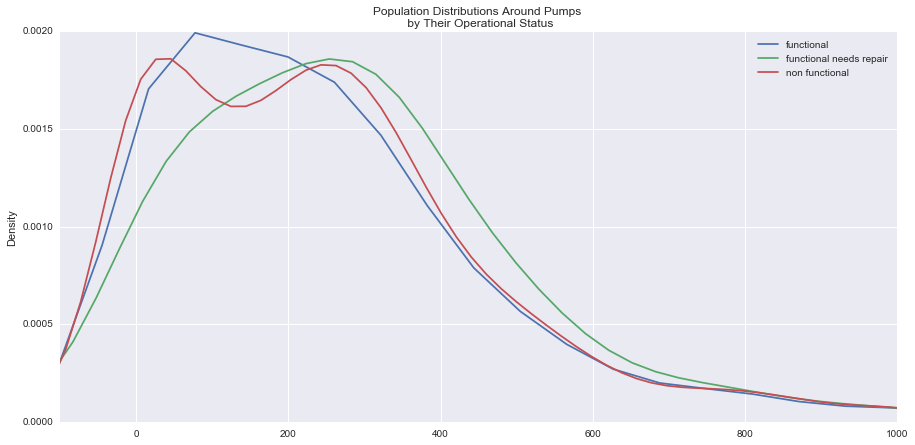

In [185]:
dat.groupby(dat.status_group)['population'].plot.kde(legend=True, title='Population Distributions Around Pumps \n by Their Operational Status', xlim=(-100,1000), figsize=(15,7)) #pop around the well

In [231]:
## LOCATION
# gps_height

(dat.gps_height == 0).sum()/float(len(dat.gps_height))

0.34407407407407409

In [232]:
dat.gps_height.replace(to_replace={0:np.nan}, inplace=True)

In [233]:
#let's look at gps_height by imputing with mean gps_height in neighboring areas, in this order:
#sub-village > ward > lga > region_code

dat.gps_height.fillna(dat.groupby(['subvillage'])['gps_height'].transform('mean'), inplace=True)
dat.gps_height.fillna(dat.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
dat.gps_height.fillna(dat.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
dat.gps_height.fillna(dat.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)

In [234]:
dat.gps_height.isnull().sum()

0

status_group
functional                 Axes(0.125,0.125;0.775x0.775)
functional needs repair    Axes(0.125,0.125;0.775x0.775)
non functional             Axes(0.125,0.125;0.775x0.775)
Name: gps_height, dtype: object

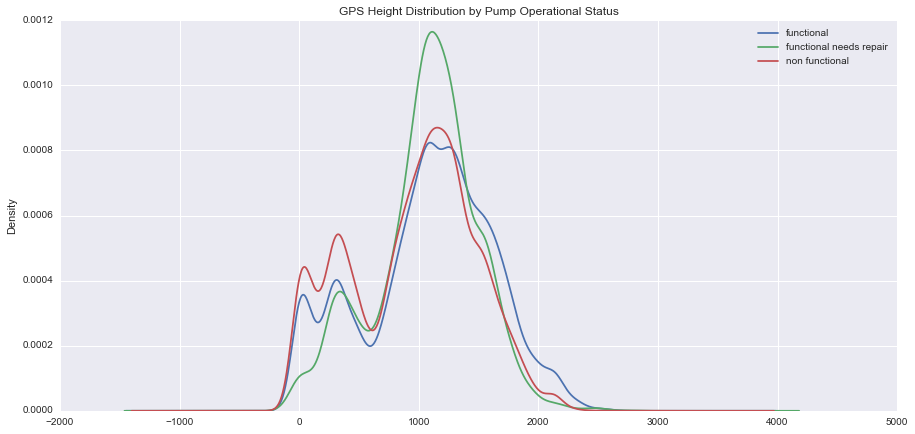

In [190]:
dat.groupby(dat.status_group)['gps_height'].plot.kde(legend=True, title='GPS Height Distribution by Pump Operational Status', figsize=(15,7)) 

In [235]:
dat_backup=dat.copy()

In [256]:
#dat=dat_backup.copy() #incase you screw up

In [264]:
dat.loc[((dat.longitude==0)&(dat.latitude==-2.000000e-08)),['latitude','longitude']]=dat.loc[((dat.longitude==0)&(dat.latitude==-2.000000e-08)),['latitude','longitude']].replace({'latitude':{-2.000000e-08:np.nan}, 'longitude':{0.0:np.nan}}, regex=False)
#doing the above using replace (inplace=True) for some reason just isn't working!
# another way to do it individually: dat['latitude'][(dat['latitude'] == -2.000000e-08) & (dat['longitude'] == 0.0)] = np.nan


In [281]:
(dat.longitude.isnull().sum(), dat.latitude.isnull().sum())

(0, 0)

In [280]:
#impute missing lats and longs using same impute strategy as for population and gps_height
dat.latitude.fillna(dat.groupby(['subvillage'])['latitude'].transform('mean'), inplace=True)
dat.longitude.fillna(dat.groupby(['subvillage'])['longitude'].transform('mean'), inplace=True)

#took care of about 700 values, use larger area now... 
dat.latitude.fillna(dat.groupby(['ward'])['latitude'].transform('mean'), inplace=True)
dat.longitude.fillna(dat.groupby(['ward'])['longitude'].transform('mean'), inplace=True)

#took care of most! only 32 left. expanding impute to "lga"
dat.latitude.fillna(dat.groupby(['lga'])['latitude'].transform('mean'), inplace=True)
dat.longitude.fillna(dat.groupby(['lga'])['longitude'].transform('mean'), inplace=True)

#that's all of it.


In [318]:
#force construction year into type int
dat['construction_year']=dat['construction_year'].astype('int64')


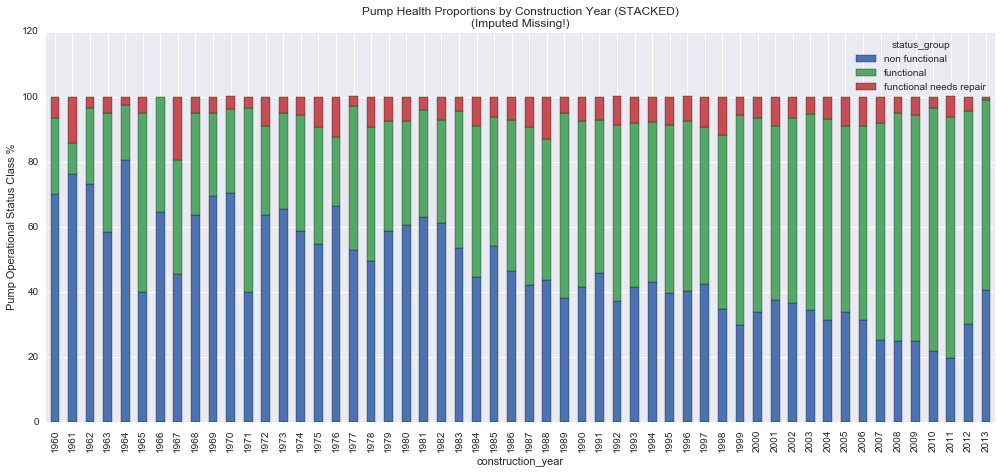

In [319]:
#revisiting construction year breakdown by outcome, after imputing
temp1=pd.crosstab(dat.status_group, dat.construction_year).apply(lambda col: ((col/col.sum()).round(3))*100, axis=0)
temp1=temp1.reindex(['non functional','functional','functional needs repair'])

fig, ax = plt.subplots(1,1,figsize=(17,7))
temp1.transpose().plot(kind='bar', legend='status_group', stacked=True, ax=ax)
ax.set_ylabel('Pump Operational Status Class %')
ax.set_title('Pump Health Proportions by Construction Year (STACKED)\n(Imputed Missing!)')

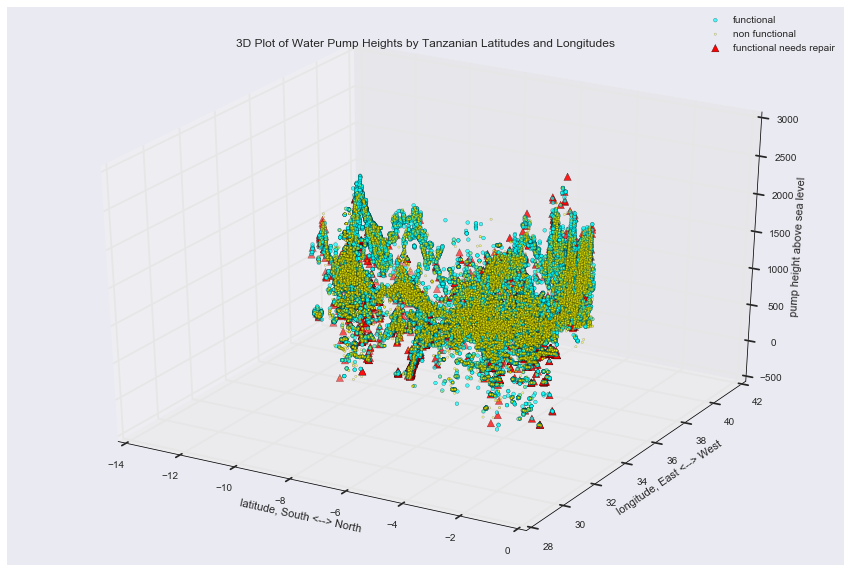

In [282]:
# now that gps_height is imputed, try replotting in 3D to better see height. Try to remove longitudinal outlier at 12
#let's go 3D with lat, long, and gps-height; by pump health

#dat = dat[dat.longitude>10]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=dat.loc[dat.status_group.isin(['functional']),'latitude'],
           ys=dat.loc[dat.status_group.isin(['functional']),'longitude'],
           zs=dat.loc[dat.status_group.isin(['functional']),'gps_height'],
           c='cyan',
           alpha=0.7,
           marker='.',
           s=55,
          label='functional')
ax.scatter(xs=dat.loc[dat.status_group.isin(['non functional']),'latitude'],
           ys=dat.loc[dat.status_group.isin(['non functional']),'longitude'],
           zs=dat.loc[dat.status_group.isin(['non functional']),'gps_height'],
           c='yellow',
           marker='.',
           alpha=.4,
          s=21,
          label='non functional')
ax.scatter(xs=dat.loc[dat.status_group.isin(['functional needs repair']),'latitude'],
           ys=dat.loc[dat.status_group.isin(['functional needs repair']),'longitude'],
           zs=dat.loc[dat.status_group.isin(['functional needs repair']),'gps_height'],
           c='red',
           marker='^',
          s=55,
          label='functional needs repair', depthshade=True)
ax.set_xlabel('latitude, South <--> North')
ax.set_ylabel('longitude, East <--> West')
ax.set_zlabel('pump height above sea level')
#ax.xy_dataLim([-14,30],[0,50])
#ax.ylim(10,50)
#ax.zlim(-500,2500)
ax.legend()
ax.set_title('3D Plot of Water Pump Heights by Tanzanian Latitudes and Longitudes')

In [301]:
#now construction year!

#going to use the same impute strategy .

#first, convert missing construction years to Nans
pd.set_option('display.max_columns', 50)
dat.loc[dat.construction_year==0,['construction_year']]=np.nan

In [311]:
dat.construction_year.isnull().sum()

0

In [310]:
#impute over 20000 NaNs
dat.construction_year.fillna(dat.groupby(['subvillage'])['construction_year'].transform('mean'), inplace=True)

#took care of 5000, expanding area...
dat.construction_year.fillna(dat.groupby(['ward'])['construction_year'].transform('mean'), inplace=True)

#only 2562 left, expanding area
dat.construction_year.fillna(dat.groupby(['lga'])['construction_year'].transform('mean'), inplace=True)

#1 left! expanding area
dat.construction_year.fillna(dat.groupby(['region_code'])['construction_year'].transform('mean'), inplace=True)


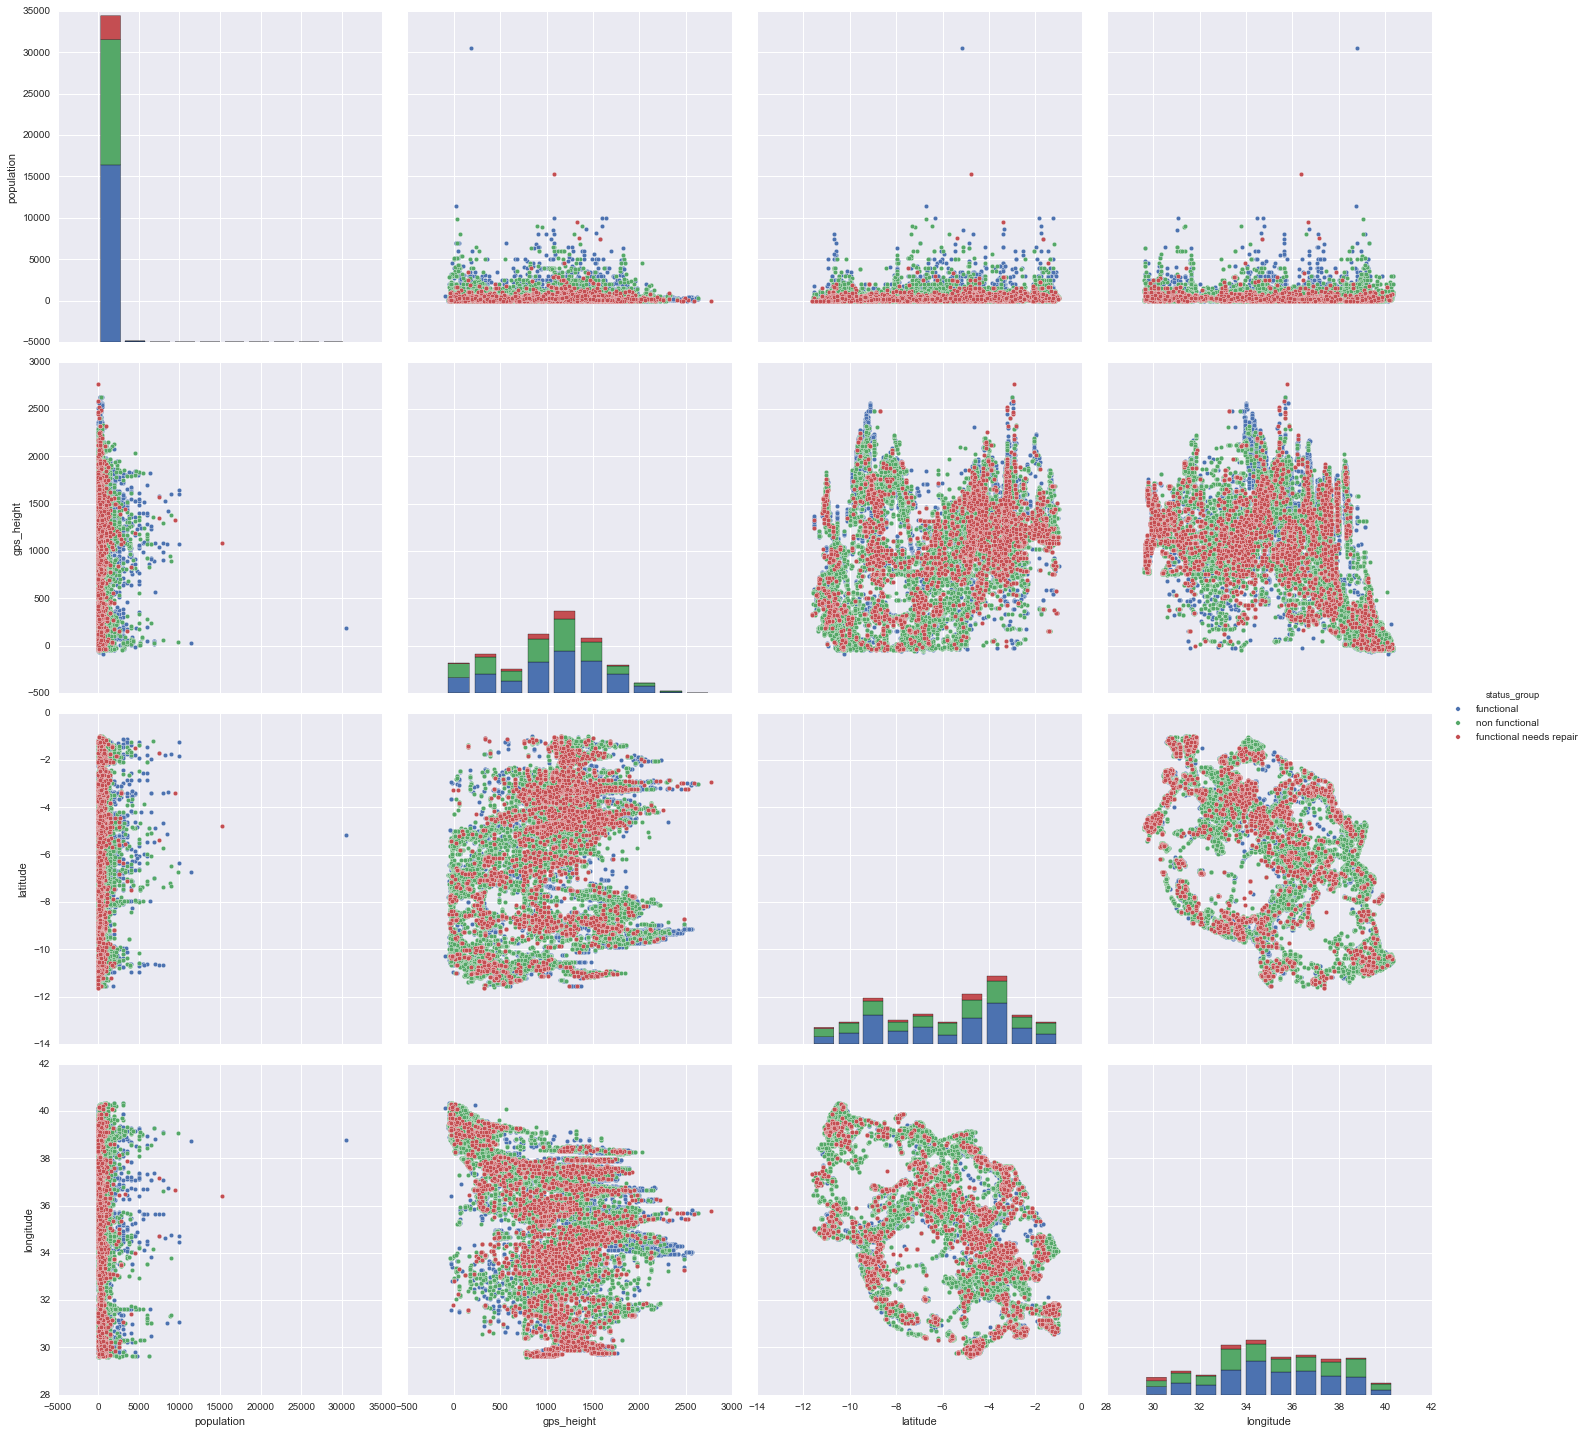

In [288]:
#okay, so now we've imputed gps_height, population, lat, long, construction_year
#let's run some classifation algos on whole dataset

sbrn.pairplot(dat.loc[:,['population','gps_height','status_group','latitude','longitude']], 
              hue="status_group",
              size=5)

In [321]:
#OKAYYYYYYYY IMPUTED our numerics
# now let's bin our categoricals 
dat.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

In [343]:
basin_dums=pd.get_dummies(dat.basin, prefix="basin")
scheme_dums=pd.get_dummies(dat.scheme_management, prefix="scheme_mngmnt")
extraction_dums=pd.get_dummies(dat.extraction_type_group, prefix="extraction_type")
water_quality_dums=pd.get_dummies(dat.water_quality, prefix="quality")
water_quantity_dums=pd.get_dummies(dat.quantity, prefix="quantity")
source_dums=pd.get_dummies(dat.source, prefix="source")
waterpoint_dums=pd.get_dummies(dat.waterpoint_type, prefix="waterpoint")

In [344]:
del(raw)

In [345]:
raw=pd.concat([dat.loc[:,['gps_height','longitude','latitude','population','construction_year']],
           basin_dums, scheme_dums, extraction_dums, water_quality_dums, water_quantity_dums, source_dums, waterpoint_dums],
          axis=1)

In [346]:
raw.to_pickle('/Users/ash/Downloads/ash_exploratory_df_0511_pumpitup.pkl')

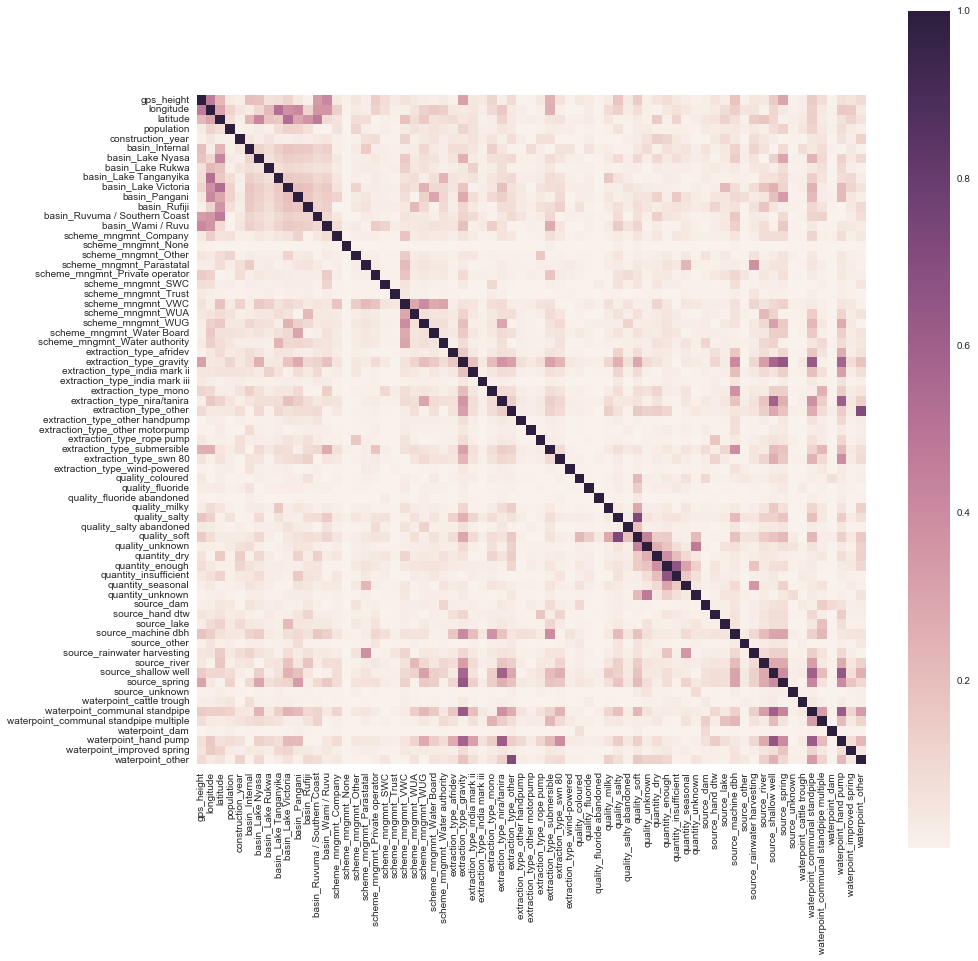

In [347]:
f, ax = plt.subplots(figsize=(15, 15))
sbrn.heatmap(abs(raw.corr()), square=True, ax=ax)

In [358]:
raw=sm.add_constant(raw, prepend=True,has_constant='skip')

In [361]:
y = dat.status_group.replace({'functional':0,'non functional':1, 'functional needs repair':2})

In [500]:
imputeCols = ['gps_height','population','latitude','longitude','construction_year', 'subvillage','ward','lga','region_code']

In [477]:
exception = 'Missing Columns! Please make sure all of the following columns are in your training frame: \n'+str(imputeCols)

In [478]:
exception

"Missing Columns! Please make sure all of the following columns are in your training frame: \n['gps_height', 'population', 'latitude', 'longitude', 'construction_year', 'sub-village', 'ward', 'lga', 'region_code']"

In [502]:
set(imputeCols) < set(list(dat.columns))

True

In [498]:
set(list(dat.columns))

set(['extraction_type', 'region_code', 'gps_height', 'recorded_by', 'longitude', 'construction_year', 'installer', 'id', 'scheme_management', 'scheme_name', 'management', 'quantity_group', 'source_class', 'source', 'subvillage', 'num_private', 'latitude', 'waterpoint_type_group', 'basin', 'extraction_type_class', 'waterpoint_type', 'wpt_name', 'management_group', 'lga', 'public_meeting', 'source_type', 'district_code', 'ward', 'payment', 'population', 'status_group', 'date_recorded', 'extraction_type_group', 'region', 'amount_tsh', 'quality_group', 'payment_type', 'water_quality', 'permit', 'funder', 'quantity'])

In [530]:
import sys
sys.path.insert(0, '/Users/ash/ds/projects/predict-water-pump-failure/src')

import impute

In [526]:
type(dat)

<class 'pandas.core.frame.DataFrame'>

In [531]:
impute.imputeTrain(dat)

TypeError: unhashable type: 'list'

In [529]:
impute.imputeTrain?